In [59]:
import math
import numpy as np
import matplotlib.pyplot as plt

from my_helpers import *

## 1

In [60]:
# For the following parallel resonant bandpass filter, find the exact center frequency of the pass band and the bandwidth. 

# Given:

Vin = 12 
L = 4.3 *si.µ
C = 100 *si.p
Rw = 9.1 
RL = 620 

In [61]:
# Center frequency
engFormat(get_exact_resonant_frequency(Rw,L,C))

'7.66774 M'

In [62]:
## Bandwidth
def get_bandwidth(Rwinding,inductance,capacitance):
    inductive_reactance = inductance/(math.sqrt(inductance*capacitance))
    quality_factor = inductive_reactance/Rwinding
    resonant_frequency = get_exact_resonant_frequency(Rwinding,inductance,capacitance)
    bandwidth = resonant_frequency/quality_factor
    return bandwidth

get_bandwidth(Rw,L,C)

336491.7958775588

In [63]:
# Minimum Output Voltage:

# Zr = Rw(Q2 + 1)
# Vout(min) = (RLoad / (Zr + RLoad)) * Vin



## 1 (attempt 2)

In [64]:
R=3*si.k
L=3.6*si.m
V = 10

In [65]:
def get_cutoff_freq_inductive(inductance,resistance):
    return resistance/two_pi(inductance)

engFormat(get_cutoff_freq_inductive(L,R))

'132.629 k'

In [66]:
def get_cutoff_freq_inductive(inductance,resistance):
    return 1/two_pi(inductance/resistance)
engFormat(get_cutoff_freq_inductive(L,R))

'132.629 k'

## 2

In [67]:
R = 220
C = 5.6 *si.n
V = 2 

fc = get_cutoff_freq_capacitive(C,R)
engFormat(fc), over_sqrt_2(V)

('129.184 k', 1.414213562373095)

## 3

In [68]:
190*(.75/47)

3.031914893617021

In [69]:
Rw = 0.75
R = 47
L = 5.1 *si.m
C = 0.024 *si.µ

get_exact_resonant_frequency(Rw+R,L,C)

14308.262754502606

In [70]:
resonant_frequency = get_exact_resonant_frequency(Rw+R,L,C)
inductive_reactance= get_inductive_reactance(L,resonant_frequency)
quality_factor = abs(inductive_reactance)/Rw
bandwidth = resonant_frequency/quality_factor

resonant_frequency, quality_factor

(14308.262754502606, 611.3299709104186)

In [71]:
## Bandwidth
def get_bandwidth(Rwinding,inductance,capacitance):
    resonant_frequency = get_exact_resonant_frequency(Rwinding,inductance,capacitance)
    inductive_reactance= get_inductive_reactance(inductance,resonant_frequency)
    quality_factor = abs(inductive_reactance)/Rwinding
    bandwidth = resonant_frequency/quality_factor
    return bandwidth

get_bandwidth(Rw,L,C)

23.40513868998461

In [72]:
## Bandwidth
def get_bandwidth(Rwinding,inductance,capacitance):
    inductive_reactance = inductance/(math.sqrt(inductance*capacitance))
    quality_factor = inductive_reactance/Rwinding
    resonant_frequency = get_exact_resonant_frequency(Rwinding,inductance,capacitance)
    bandwidth = resonant_frequency/quality_factor
    return bandwidth

get_bandwidth(Rw,L,C)

23.40510771257467

## 4
At a certain frequency, the output voltage of a filter is Vout = 3.85 V and the input voltage is Vin = 7 V. Express the voltage ratio (Vout/Vin) in decibels.

In [73]:
Vin = 7
Vout = 3.85
20*math.log10(Vout/Vin)

-5.192746210115122

In [74]:
Vout/Vin

0.55

In [75]:
math.log10(Vout/Vin)

-0.2596373105057561

In [76]:
10**math.log10(Vout/Vin)

0.55

### I needed to use `log10()` instead of `log()`, which by default returns $\log_e()$

## 4 (2)

In [77]:
# For the following series resonant bandpass filter, find the center frequency of the pass band, the bandwidth, and the output voltage at the center frequency.

# Given:

Vin =100 *si.m#V
Rw = 0.91 #Ω
R = 47 #Ω
L = 5.6 *si.m#H
C = 0.024 *si.µ#F

In [78]:
get_exact_resonant_frequency(Rw+R,L,C)

13660.725987319514

In [79]:
get_bandwidth(Rw,L,C)

25.862632359069714

In [80]:
100*(Rw/sum([Rw,R]))

1.89939469839282

## 5

In [81]:
# Find the cutoff frequency of the following RC Low pass filter. Also, find the output voltage at the cutoff frequency.

# Given:

R = 150 
C = 3.6 *si.n
Vin = 3 

engFormat(get_cutoff_freq_capacitive(C,R))
over_sqrt_2(Vin)

2.1213203435596424

## 6

In [82]:
# For the following parallel resonant band-stop filter, find the exact center frequency of the stop band and the bandwidth. 

# Given:

# Vin = 12 V
L = 68 *si.m
C = 0.047 *si.u
Rw = 18

get_exact_resonant_frequency(Rw,L,C)

2814.933325855268

In [83]:
get_bandwidth(Rw,L,C)

42.124532140982495

## 7

In [84]:
Rw = 12 
RLoad = 130 
L = 1.8*si.m
C = 27*si.p

In [85]:
get_exact_resonant_frequency(Rw,L,C)

721940.7029265518

In [86]:
get_bandwidth(Rw+RLoad,L,C)

12553.657701268337

## 7 (2)

In [87]:
# For the following parallel resonant bandpass filter, find the exact center frequency of the pass band and the bandwidth. 

# Given:

Vin = 10 #V
L = 5.6*si.µ#H
C = 180*si.p#F
Rw = 6.8 #Ω
RL = 750 #Ω

# Center Frequency:
# Bandwidth:
# Maximum Output Voltage:
# Minimum Output Voltage:

In [88]:
fc = get_exact_resonant_frequency(Rw,L,C)
bw = get_bandwidth(Rw,L,C)
engFormat(fc), engFormat(bw)

('5.00918 M', '193.116 k')

In [91]:
def get_tank_impedance(Rwinding,inductance,capacitance,frequency=False):
    if not frequency:
        frequency = get_exact_resonant_frequency(Rwinding,inductance,capacitance)
    Xl = get_inductive_reactance(inductance,frequency)
    Xc = get_capacitive_reactance(capacitance,frequency)
    Z = recipsumrecip([Xc,sum([Xl,Rwinding])])
    return Z

Ztank = get_tank_impedance(Rw,L,C)
Ztank

(4575.16339869281+0j)

In [94]:
# minimum output voltage
Vin*(RL/sum([Ztank,RL]))
RL/sum([abs(Ztank),RL])

0.140840748695919

9.910147991541564


9.91014799154334

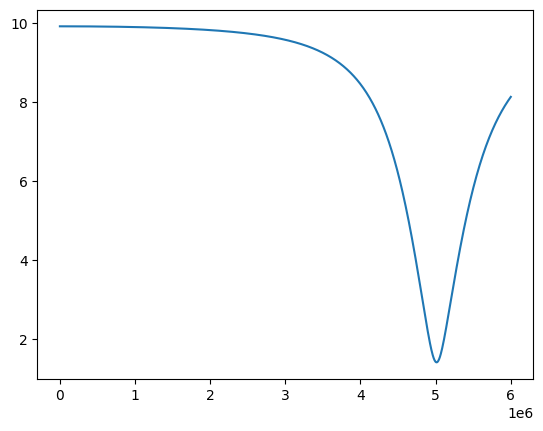

In [101]:
# max output voltage
freqs = np.linspace(10,6*si.M,1000)
voltages = []

for freq in freqs:
    Ztank = get_tank_impedance(Rw,L,C,freq)
    Vout = abs(Vin*(RL/sum([Ztank,RL])))
    voltages.append(Vout)

plt.plot(freqs,voltages)
print(max(voltages))
Vin*(750/(750+6.8))

## 8

In [103]:
# Find the cutoff frequency of the following RL High pass filter. Also, find the output voltage at the cutoff frequency.

# Given:

R = 3.3 *si.k#Ω
L = 5.6 *si.m#H
Vin = 8 #V

R/two_pi(L), get_cutoff_freq_inductive(L,R)

(93787.73432200975, 93787.73432200975)

In [104]:
over_sqrt_2(Vin)

5.65685424949238

## 9

At a certain frequency, the output voltage of a filter is Vout = 7.8 V and the input voltage is Vin = 12 V. Express the voltage ratio (Vout/Vin) in decibels.



In [106]:
Vin = 12
Vout = 7.8

20*math.log10(Vout/Vin)

-3.7417328671428884